In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.utils import to_categorical


In [2]:
keras = tf.keras

In [3]:
# devuelve imagenes de digitos escritos a mano en escala de grises
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train', X_train.shape)

X_train (60000, 28, 28)


In [4]:
# una imagen de un solo digito en concreto
# cada valor de pixel tiene un némero entre 0 y 255 (escala de 8 bits)
# se puede normalizar a escala entre 0 y 1 diviendi entre 256, con eso logramos más eficiencia en el entrenamiento
single_image = X_train[1] # 0 es un 5, 1 es un cero
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
single_image.shape # es una imagen de 28 por 28 px

(28, 28)

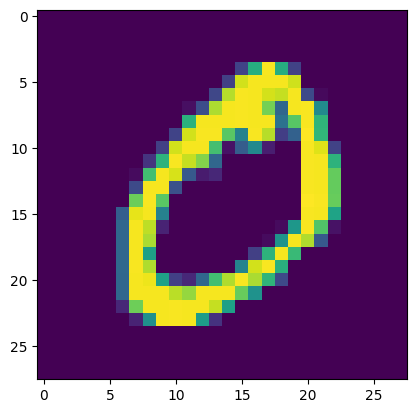

In [6]:
plt.imshow(single_image, cmap='viridis')

In [7]:
y_train # indica el dígito real que hay en la imagen
print(y_train[0])
print(y_train[1])

5
0


In [8]:
# pasamos la salida "y" a one-hot para poder usar métricas de clasificacion en el entrenamiento
# hay 10 clases: 0 1 2 3 4 5 6 7 8 9
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)
y_train_onehot[:1] # vemos que está activado el que esta en la posicion 5, que contiene un 1 ahora, y por tanto es el numero 5


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [9]:

# aplanar la entrada manualmente , para que tenga 2D ya que las capas Dense necesitan 2D en la X
# X_train_flatten = X_train.reshape(-1, 28*28)
# X_test_flatten = X_test.reshape(-1, 28*28)
# X_train_flatten[:10]
# alternativa: aplanarla en el modelo con una capa Flatten

## Red Neuronal normal

Al aplanar las imágenes 28x28 -> ???

In [10]:
import random
# 0. random state
keras.backend.clear_session()
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Arquitectura
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Convierte (28, 28) en (784,) para aplanar la imagen y poder leerla con capas Dense
    keras.layers.Dense(256, activation='relu'), # ponemos tantas neuronas como clases tengamos
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'), 
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'), 
    keras.layers.Dense(10, activation='softmax'), # capa de salida para clasificacion multiclase con 10 neuronas
  
])

# Opcion 2:
# alternativa usando también Sequential pero agregando las capas por separado
#model = keras.Sequential()
#model.add(keras.layers.Dense(64, activation='relu'))
#model.add(keras.layers.Dense(64, activation='relu'))
#model.add(keras.layers.Dense(10, activation='softmax'))

# Compile
model.compile(
    loss=keras.losses.CategoricalCrossentropy(), 
    optimizer=keras.optimizers.Adam(),   
    metrics=[
        'accuracy', # al escribirlo como teto, Keras seleccionará el accuracy más idoneo dependiendo de si es clasificacion binaria o multiclase
        keras.metrics.Precision(),
        keras.metrics.Recall(),
        keras.metrics.AUC(),
        ] 
)

# Opcional: para interrumpir el fit automaticamente si no mejora tras X epochs
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', # Métrica a revisar para decidir interrumpir el fit
    patience=10, # numero de epochs que tienen que transcurrir sin mejora para interrumpir el fit
    mode='min', # 'min' para minimizar el val_loss (puede que ya lo pille por defecto)
    verbose=1,
    restore_best_weights=True # restaura los mejores pesos del epoch antes de ver que no mejora
    
    )

# entrenar
model.fit(X_train, y_train_onehot, validation_split=0.2, epochs=20, verbose=1, batch_size=32)




Epoch 1/20


c:\Users\carol\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7537 - auc: 0.9441 - loss: 0.8366 - precision: 0.8679 - recall: 0.6859 - val_accuracy: 0.9396 - val_auc: 0.9947 - val_loss: 0.2202 - val_precision: 0.9576 - val_recall: 0.9247
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9439 - auc: 0.9946 - loss: 0.2119 - precision: 0.9626 - recall: 0.9307 - val_accuracy: 0.9527 - val_auc: 0.9949 - val_loss: 0.1906 - val_precision: 0.9662 - val_recall: 0.9400
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9605 - auc: 0.9961 - loss: 0.1552 - precision: 0.9720 - recall: 0.9500 - val_accuracy: 0.9596 - val_auc: 0.9961 - val_loss: 0.1570 - val_precision: 0.9723 - val_recall: 0.9482
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9678 - auc: 0.9971 - loss: 0.1266 - precision: 0.9769 - recall: 0.9598 - val_accuracy: 0.9636 - val_auc: 0.9959 - val_loss: 0.1504 - val_precision: 0.9738 - val_recall: 0.9546
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 997,232 (3.80 MB)

 Trainable params: 332,410 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 664,822 (2.54 MB)

In [12]:
df_history = pd.DataFrame(model.history.history)
df_history.head()

,accuracy,auc,loss,precision,recall,val_accuracy,val_auc,val_loss,val_precision,val_recall
0,0.870208,0.984261,0.455871,0.929217,0.835792,0.939583,0.994667,0.220209,0.957629,0.924750
1,0.949646,0.994882,0.195885,0.965745,0.936813,0.952667,0.994935,0.190609,0.966167,0.940000
2,0.962208,0.996243,0.149887,0.973329,0.951896,0.959583,0.996091,0.157038,0.972312,0.948167
3,0.968479,0.997244,0.123222,0.977520,0.960250,0.963583,0.995905,0.150442,0.973816,0.954583
4,0.974042,0.997870,0.102170,0.982178,0.966708,0.948417,0.990626,0.247656,0.957355,0.941000


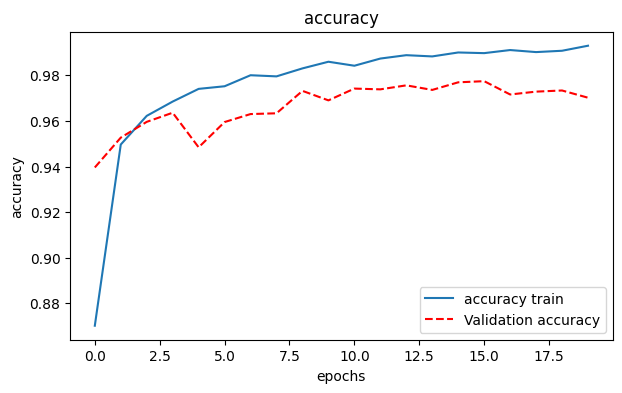

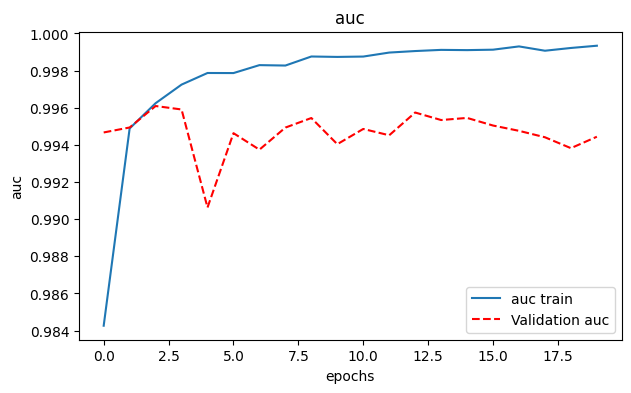

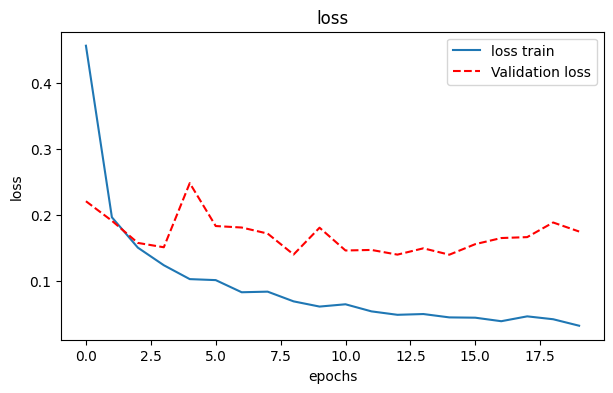

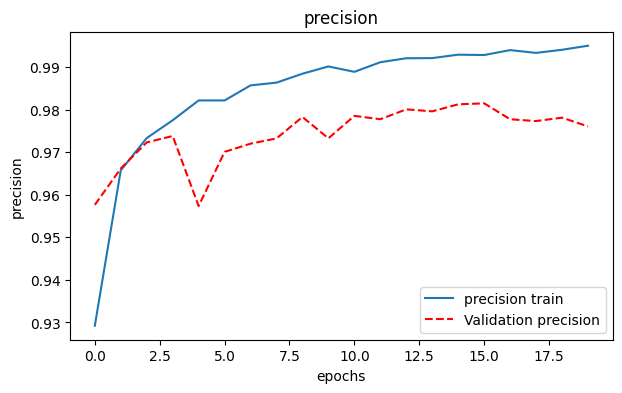

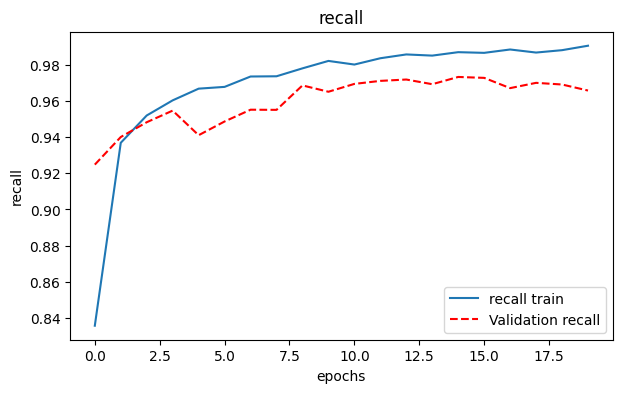

In [13]:
def plot_history(df_history):
    train_metrics = [col for col in df_history.columns if not col.startswith('val_')]
    for metric in train_metrics:
        plt.figure(figsize=(7, 4))
        plt.plot(df_history[metric], label=(f'{metric} train'))
        
        val_metric = f'val_{metric}'
        if val_metric in df_history.columns:
            plt.plot(df_history[val_metric], label=f'Validation {metric}', linestyle='dashed', color='red')

        plt.title(metric)
        plt.xlabel('epochs')
        plt.ylabel(metric)
        plt.legend()
        plt.show()            

plot_history(df_history) 

In [14]:
model.predict(X_test)[:5] # probabilidades

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.0000000e+00, 4.8447345e-15, 9.1840341e-11, 9.1296239e-16,
        1.4667127e-20, 5.5823919e-20, 0.0000000e+00, 1.0000000e+00,
        1.3182385e-27, 4.0322784e-10],
       [4.1711433e-17, 3.6522446e-35, 9.9999893e-01, 1.0713329e-06,
        3.1149037e-24, 1.0403331e-25, 1.2071591e-30, 1.6711911e-13,
        1.6877952e-19, 0.0000000e+00],
       [2.7396658e-37, 1.0000000e+00, 2.3334439e-19, 1.7451009e-15,
        1.8699415e-24, 2.0389020e-20, 1.4300845e-25, 3.4175275e-13,
        3.3119164e-19, 1.1875740e-24],
       [9.9999774e-01, 8.6005611e-21, 8.3150527e-13, 1.4355131e-19,
        1.2769527e-18, 4.5472400e-11, 2.2576530e-06, 6.1720336e-14,
        5.5764761e-15, 4.7847062e-13],
       [1.0600964e-25, 7.1976815e-22, 1.7571963e-25, 4.5449238e-31,
        1.0000000e+00, 4.2816148e-23, 1.4746010e-27, 2.3866447e-15,
        1.3891888e-23, 4.3792017e-10]], dtype=float32)

In [15]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step


array([7, 2, 1, 0, 4])

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.98      0.96      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.93      0.96       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.93      0.95       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [17]:
df_comparison = pd.DataFrame({'real': y_test, 'prediccion': y_pred})
df_comparison.head()


,real,prediccion
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


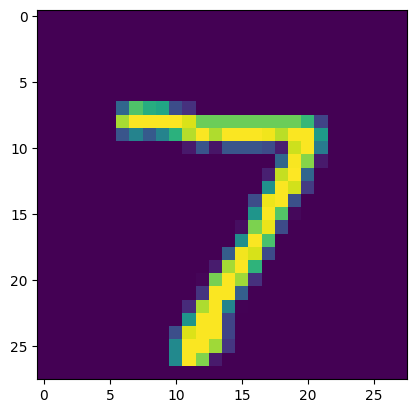

In [18]:
plt.imshow(X_test[0].reshape(28,28), cmap='viridis')

In [19]:
X_test.shape

(10000, 28, 28)

In [20]:
X_test[0].shape

(28, 28)

In [21]:
# pasar una imagen a 3D para que luego el Flatten haga su trabajo
image_to_predict = X_test[0].reshape(1, 28, 28)
image_to_predict.shape


(1, 28, 28)

In [22]:
# hacer una predicción
model.predict(image_to_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.0000000e+00, 4.8447345e-15, 9.1840160e-11, 9.1295890e-16,
        1.4667016e-20, 5.5823919e-20, 0.0000000e+00, 1.0000000e+00,
        1.3182385e-27, 4.0322706e-10]], dtype=float32)

In [23]:
np.argmax(model.predict(image_to_predict), axis=1) # el modelo predice que la imagen es el número 7

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([7])

## Red neuronal de convolución: CNN



In [24]:
X_train.shape # 3D, pero necesitamos 4D para la CNN

(60000, 28, 28)

In [25]:
# Redimensionar X para CNN (canal de color = 1) 4D
# num_samples, 28, 28, 1 canal de color (1 para escala de grises o 3 para RGB)
# LAs capas CNN esperan entradas en formato 4D (batch_sizze, height, width, channels)
X_train_cnn = X_train.reshape(-1, 28, 28, 1). shape
X_test_cnn = X_test.reshape(-1, 28, 28, 1). shape

X_train_cnn

(60000, 28, 28, 1)

In [27]:
# 0. random state
keras.backend.clear_session()
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Arquitectura
model = keras.Sequential([
    # priumera capa convolucional
    keras.layers.Conv2D(filters=16, kernel_size=(3,3)), # filters es el num de filtros o kernels q se aplican en la capa convolucional (lo que queremos que aprenda de la imagen)
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(filters=32, kernel_size=(3,3)), # filters es el num de filtros o kernels q se aplican en la capa convolucional (lo que queremos que aprenda de la imagen)
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    
    
    keras.layers.Flatten(), # aplanado para llegar a las capas densas
    keras.layers.Dense(256, activation='relu'), # ponemos tantas neuronas como clases tengamos
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'), 
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'), 
    keras.layers.Dense(10, activation='softmax'), # clasificacion multiclase con 10 neuronas 
])

# Opcion 2:
# alternativa usando también Sequential pero agregando las capas por separado
#model = keras.Sequential()
#model.add(keras.layers.Dense(64, activation='relu'))
#model.add(keras.layers.Dense(64, activation='relu'))
#model.add(keras.layers.Dense(10, activation='softmax'))

# Compile
model.compile(
    loss=keras.losses.CategoricalCrossentropy(), 
    optimizer=keras.optimizers.Adam(),   
    metrics=[
        'accuracy', # al escribirlo como teto, Keras seleccionará el accuracy más idoneo dependiendo de si es clasificacion binaria o multiclase
        keras.metrics.Precision(),
        keras.metrics.Recall(),
        keras.metrics.AUC(),
        ] 
)

# Opcional: para interrumpir el fit automaticamente si no mejora tras X epochs
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', # Métrica a revisar para decidir interrumpir el fit
    patience=10, # numero de epochs que tienen que transcurrir sin mejora para interrumpir el fit
    mode='min', # 'min' para minimizar el val_loss (puede que ya lo pille por defecto)
    verbose=1,
    restore_best_weights=True # restaura los mejores pesos del epoch antes de ver que no mejora
    
    )

# entrenar
model.fit(X_train_cnn, y_train, validation_split=0.2, epochs=20, verbose=1, batch_size=32)



ValueError: Argument `validation_split` is only supported for tensors or NumPy arrays.Found incompatible type in the input: [<class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>]